In [1]:
# https://jacobgil.github.io/pytorch-gradcam-book/Class%20Activation%20Maps%20for%20Semantic%20Segmentation.html

In [2]:
#Grad cam: https://arxiv.org/abs/1610.02391

In [3]:
import bia_bob

In [4]:
import stackview
import PIL
import numpy as np

In [43]:
from torchvision.models.segmentation import DeepLabV3_ResNet50_Weights as W
classes = W.DEFAULT.meta["categories"]
class_to_idx = {cls: idx for (idx, cls) in enumerate(classes)}
class_to_idx

{'__background__': 0,
 'aeroplane': 1,
 'bicycle': 2,
 'bird': 3,
 'boat': 4,
 'bottle': 5,
 'bus': 6,
 'car': 7,
 'cat': 8,
 'chair': 9,
 'cow': 10,
 'diningtable': 11,
 'dog': 12,
 'horse': 13,
 'motorbike': 14,
 'person': 15,
 'pottedplant': 16,
 'sheep': 17,
 'sofa': 18,
 'train': 19,
 'tvmonitor': 20}

In [6]:
selected_class_idx = class_to_idx["cat"]
selected_class_idx

8

In [7]:
from skimage.transform import resize

StackViewNDArray([[[ 54,  60,  68],
                   [ 54,  59,  67],
                   [ 51,  57,  65],
                   ...,
                   [176, 158, 122],
                   [177, 159, 123],
                   [177, 159, 123]],

                  [[ 61,  65,  66],
                   [ 60,  64,  65],
                   [ 58,  62,  61],
                   ...,
                   [177, 159, 122],
                   [176, 158, 122],
                   [176, 158, 122]],

                  [[ 63,  67,  67],
                   [ 63,  67,  68],
                   [ 61,  64,  66],
                   ...,
                   [176, 158, 122],
                   [176, 158, 121],
                   [176, 158, 122]],

                  ...,

                  [[ 99,  88,  76],
                   [ 95,  84,  71],
                   [ 94,  81,  67],
                   ...,
                   [107,  86,  61],
                   [107,  85,  61],
                   [106,  84,  60]],

                  [[118, 109,  97],
                   [121, 109,  96],
                   [133, 118,  97],
                   ...,
                   [109,  87,  62],
                   [109,  87,  63],
                   [110,  88,  64]],

                  [[129, 119, 100],
                   [170, 159, 131],
                   [220, 212, 172],
                   ...,
                   [110,  88,  61],
                   [110,  89,  63],
                   [110,  89,  63]]], dtype=uint8)
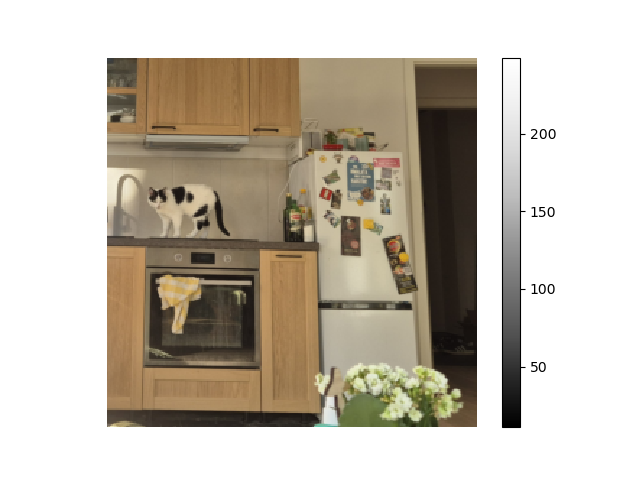
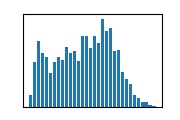

In [22]:
from skimage.io import imread
import stackview

# Load the image
#original_image = imread('htw-front.jpg')[585:1609:4, 776:1800:4]
original_image = resize(imread('kitchen_cat.jpg')[256:,256:], (256, 256, 3), preserve_range=True).astype(np.uint8)
stackview.insight(original_image)

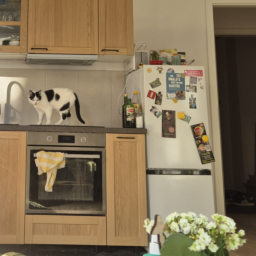

In [23]:
pil_image = PIL.Image.fromarray(original_image)
pil_image

In [24]:
def resize_image(image, size=(256, 256)):
    from PIL import Image
    return image.resize(size, Image.Resampling.LANCZOS)

In [25]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')
from torchvision.models.segmentation import deeplabv3_resnet50
import torch
import torch.functional as F
import numpy as np
import requests
import torchvision
from PIL import Image
from pytorch_grad_cam.utils.image import show_cam_on_image, preprocess_image

image = np.array(resize_image(pil_image))
rgb_img = np.float32(image) / 255
input_tensor = preprocess_image(rgb_img,
                                mean=[0.485, 0.456, 0.406],
                                std=[0.229, 0.224, 0.225])
# Taken from the torchvision tutorial
# https://pytorch.org/vision/stable/auto_examples/plot_visualization_utils.html
resnet_model = deeplabv3_resnet50(pretrained=True, progress=False)


In [26]:
#model.backbone

In [27]:
model = resnet_model.eval()

if torch.cuda.is_available():
    model = model.cuda()
    input_tensor = input_tensor.cuda()

output = model(input_tensor)
print(type(output), output.keys())

<class 'collections.OrderedDict'> odict_keys(['out', 'aux'])


In [28]:
output["out"].shape

torch.Size([1, 21, 256, 256])

StackViewNDArray([[-1.1230907 , -1.1230907 , -1.1230907 , ...,
                   -1.0745074 , -1.0745074 , -1.0745074 ],
                  [-1.1230907 , -1.1230907 , -1.1230907 , ...,
                   -1.0745074 , -1.0745074 , -1.0745074 ],
                  [-1.1230907 , -1.1230907 , -1.1230907 , ...,
                   -1.0745074 , -1.0745074 , -1.0745074 ],
                  ...,
                  [-0.04355237, -0.04355237, -0.04355237, ...,
                   -1.076685  , -1.076685  , -1.076685  ],
                  [-0.04355237, -0.04355237, -0.04355237, ...,
                   -1.076685  , -1.076685  , -1.076685  ],
                  [-0.04355237, -0.04355237, -0.04355237, ...,
                   -1.076685  , -1.076685  , -1.076685  ]], dtype=float32)
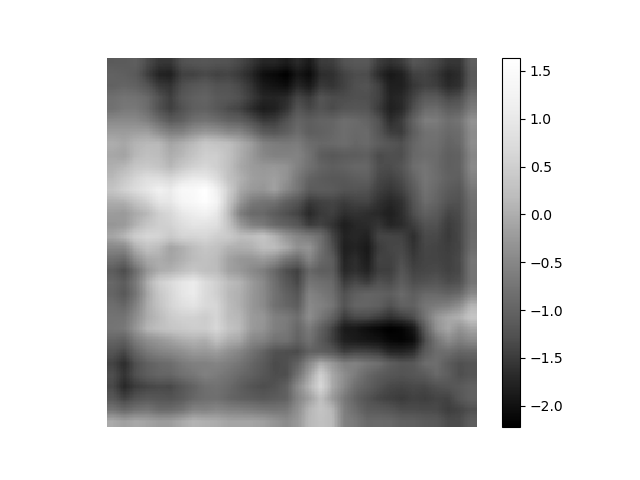
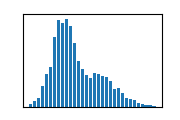

In [29]:
selected_output = output["out"][0, selected_class_idx,...]
selected_output_image = selected_output.cpu().detach().numpy()
stackview.insight(selected_output_image)

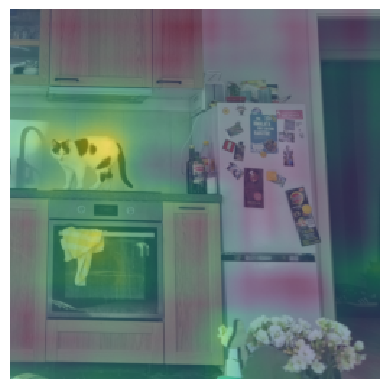

In [30]:
stackview.imshow(original_image, continue_drawing=True)
stackview.imshow(selected_output_image, colormap='viridis', alpha=0.5)

StackViewNDArray([[[[ 8.448554  ,  8.448554  ,  8.448554  , ...,
                      9.309494  ,  9.309494  ,  9.309494  ],
                    [ 8.448554  ,  8.448554  ,  8.448554  , ...,
                      9.309494  ,  9.309494  ,  9.309494  ],
                    [ 8.448554  ,  8.448554  ,  8.448554  , ...,
                      9.309494  ,  9.309494  ,  9.309494  ],
                    ...,
                    [ 7.3991213 ,  7.3991213 ,  7.3991213 , ...,
                      6.6411123 ,  6.6411123 ,  6.6411123 ],
                    [ 7.3991213 ,  7.3991213 ,  7.3991213 , ...,
                      6.6411123 ,  6.6411123 ,  6.6411123 ],
                    [ 7.3991213 ,  7.3991213 ,  7.3991213 , ...,
                      6.6411123 ,  6.6411123 ,  6.6411123 ]],

                   [[-1.8382177 , -1.8382177 , -1.8382177 , ...,
                     -1.4897548 , -1.4897548 , -1.4897548 ],
                    [-1.8382177 , -1.8382177 , -1.8382177 , ...,
                     -1.4897548 , -1.4897548 , -1.4897548 ],
                    [-1.8382177 , -1.8382177 , -1.8382177 , ...,
                     -1.4897548 , -1.4897548 , -1.4897548 ],
                    ...,
                    [-2.5703592 , -2.5703592 , -2.5703592 , ...,
                     -2.504041  , -2.504041  , -2.504041  ],
                    [-2.5703592 , -2.5703592 , -2.5703592 , ...,
                     -2.504041  , -2.504041  , -2.504041  ],
                    [-2.5703592 , -2.5703592 , -2.5703592 , ...,
                     -2.504041  , -2.504041  , -2.504041  ]],

                   [[-2.4289575 , -2.4289575 , -2.4289575 , ...,
                     -2.7754087 , -2.7754087 , -2.7754087 ],
                    [-2.4289575 , -2.4289575 , -2.4289575 , ...,
                     -2.7754087 , -2.7754087 , -2.7754087 ],
                    [-2.4289575 , -2.4289575 , -2.4289575 , ...,
                     -2.7754087 , -2.7754087 , -2.7754087 ],
                    ...,
                    [-2.2446501 , -2.2446501 , -2.2446501 , ...,
                     -1.5935936 , -1.5935936 , -1.5935936 ],
                    [-2.2446501 , -2.2446501 , -2.2446501 , ...,
                     -1.5935936 , -1.5935936 , -1.5935936 ],
                    [-2.2446501 , -2.2446501 , -2.2446501 , ...,
                     -1.5935936 , -1.5935936 , -1.5935936 ]],

                   ...,

                   [[-1.3076018 , -1.3076018 , -1.3076018 , ...,
                      0.11445317,  0.11445317,  0.11445317],
                    [-1.3076018 , -1.3076018 , -1.3076018 , ...,
                      0.11445317,  0.11445317,  0.11445317],
                    [-1.3076018 , -1.3076018 , -1.3076018 , ...,
                      0.11445317,  0.11445317,  0.11445317],
                    ...,
                    [ 2.775128  ,  2.775128  ,  2.775128  , ...,
                      1.9368035 ,  1.9368035 ,  1.9368035 ],
                    [ 2.775128  ,  2.775128  ,  2.775128  , ...,
                      1.9368035 ,  1.9368035 ,  1.9368035 ],
                    [ 2.775128  ,  2.775128  ,  2.775128  , ...,
                      1.9368035 ,  1.9368035 ,  1.9368035 ]],

                   [[ 0.79925627,  0.79925627,  0.79925627, ...,
                      1.3027034 ,  1.3027034 ,  1.3027034 ],
                    [ 0.79925627,  0.79925627,  0.79925627, ...,
                      1.3027034 ,  1.3027034 ,  1.3027034 ],
                    [ 0.79925627,  0.79925627,  0.79925627, ...,
                      1.3027034 ,  1.3027034 ,  1.3027034 ],
                    ...,
                    [-0.9966432 , -0.9966432 , -0.9966432 , ...,
                     -1.2055846 , -1.2055846 , -1.2055846 ],
                    [-0.9966432 , -0.9966432 , -0.9966432 , ...,
                     -1.2055846 , -1.2055846 , -1.2055846 ],
                    [-0.9966432 , -0.9966432 , -0.9966432 , ...,
                     -1.2055846 , -1.2055846 , -1.2055846 ]],

                   [[ 1.7152909 ,  1.7152909 ,  1.7152909 , 
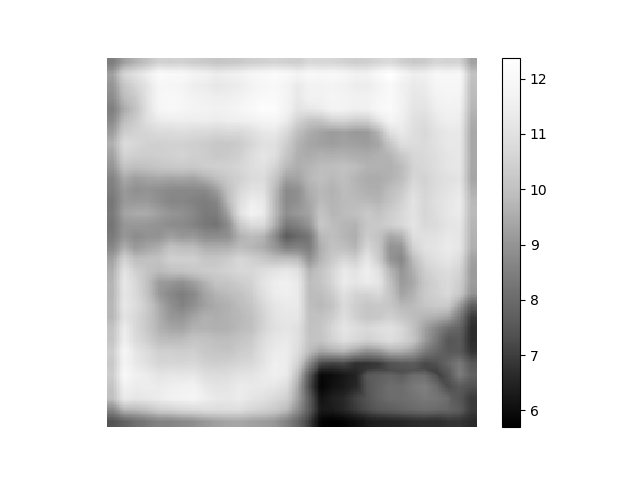
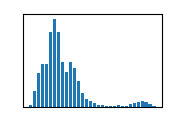

In [31]:
class SegmentationModelOutputWrapper(torch.nn.Module):
    def __init__(self, model): 
        super(SegmentationModelOutputWrapper, self).__init__()
        self.model = model
        
    def forward(self, x):
        return self.model(x)["out"]
    
seg_model = SegmentationModelOutputWrapper(model)
seg_output = seg_model(input_tensor)

stackview.insight(seg_output.cpu().detach().numpy())


In [32]:
np.array_equal(seg_output.cpu().detach().numpy(), output["out"].cpu().detach().numpy())

True

StackViewNDArray([[[[9.91198838e-01, 9.91198838e-01, 9.91198838e-01,
                     ..., 9.97197866e-01, 9.97197866e-01,
                     9.97197866e-01],
                    [9.91198838e-01, 9.91198838e-01, 9.91198838e-01,
                     ..., 9.97197866e-01, 9.97197866e-01,
                     9.97197866e-01],
                    [9.91198838e-01, 9.91198838e-01, 9.91198838e-01,
                     ..., 9.97197866e-01, 9.97197866e-01,
                     9.97197866e-01],
                    ...,
                    [9.49759543e-01, 9.49759543e-01, 9.49759543e-01,
                     ..., 8.37670445e-01, 8.37670445e-01,
                     8.37670445e-01],
                    [9.49759543e-01, 9.49759543e-01, 9.49759543e-01,
                     ..., 8.37670445e-01, 8.37670445e-01,
                     8.37670445e-01],
                    [9.49759543e-01, 9.49759543e-01, 9.49759543e-01,
                     ..., 8.37670445e-01, 8.37670445e-01,
                     8.37670445e-01]],

                   [[3.37810052e-05, 3.37810052e-05, 3.37810052e-05,
                     ..., 2.03576310e-05, 2.03576310e-05,
                     2.03576310e-05],
                    [3.37810052e-05, 3.37810052e-05, 3.37810052e-05,
                     ..., 2.03576310e-05, 2.03576310e-05,
                     2.03576310e-05],
                    [3.37810052e-05, 3.37810052e-05, 3.37810052e-05,
                     ..., 2.03576310e-05, 2.03576310e-05,
                     2.03576310e-05],
                    ...,
                    [4.44552752e-05, 4.44552752e-05, 4.44552752e-05,
                     ..., 8.94095137e-05, 8.94095137e-05,
                     8.94095137e-05],
                    [4.44552752e-05, 4.44552752e-05, 4.44552752e-05,
                     ..., 8.94095137e-05, 8.94095137e-05,
                     8.94095137e-05],
                    [4.44552752e-05, 4.44552752e-05, 4.44552752e-05,
                     ..., 8.94095137e-05, 8.94095137e-05,
                     8.94095137e-05]],

                   [[1.87118785e-05, 1.87118785e-05, 1.87118785e-05,
                     ..., 5.62826744e-06, 5.62826744e-06,
                     5.62826744e-06],
                    [1.87118785e-05, 1.87118785e-05, 1.87118785e-05,
                     ..., 5.62826744e-06, 5.62826744e-06,
                     5.62826744e-06],
                    [1.87118785e-05, 1.87118785e-05, 1.87118785e-05,
                     ..., 5.62826744e-06, 5.62826744e-06,
                     5.62826744e-06],
                    ...,
                    [6.15711251e-05, 6.15711251e-05, 6.15711251e-05,
                     ..., 2.22221381e-04, 2.22221381e-04,
                     2.22221381e-04],
                    [6.15711251e-05, 6.15711251e-05, 6.15711251e-05,
                     ..., 2.22221381e-04, 2.22221381e-04,
                     2.22221381e-04],
                    [6.15711251e-05, 6.15711251e-05, 6.15711251e-05,
                     ..., 2.22221381e-04, 2.22221381e-04,
                     2.22221381e-04]],

                   ...,

                   [[5.74269943e-05, 5.74269943e-05, 5.74269943e-05,
                     ..., 1.01257196e-04, 1.01257196e-04,
                     1.01257196e-04],
                    [5.74269943e-05, 5.74269943e-05, 5.74269943e-05,
                     ..., 1.01257196e-04, 1.01257196e-04,
                     1.01257196e-04],
                    [5.74269943e-05, 5.74269943e-05, 5.74269943e-05,
                     ..., 1.01257196e-04, 1.01257196e-04,
                     1.01257196e-04],
                    ...,
                    [9.32049286e-03, 9.32049286e-03, 9.32049286e-03,
                     ..., 7.58608570e-03, 7.58608570e-03,
                     7.58608570e-03],
                    [9.32049286e-03, 9.32049286e-03, 9.32049286e-03,
                     ..., 7.58608570e-03, 7.58608570e-03,
                     7.58608570e-03],
                    [9.32049286e-03, 9.32049286e-03, 9.32049286e-03,
     
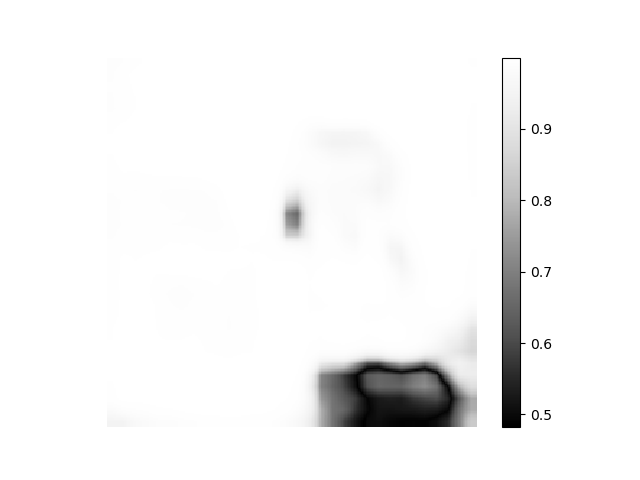
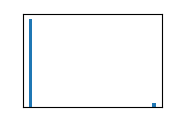

In [33]:


normalized_masks = torch.nn.functional.softmax(seg_output, dim=1).cpu()

stackview.insight(normalized_masks.cpu().detach().numpy())

StackViewNDArray([[0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0],
                  ...,
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0]], dtype=int64)
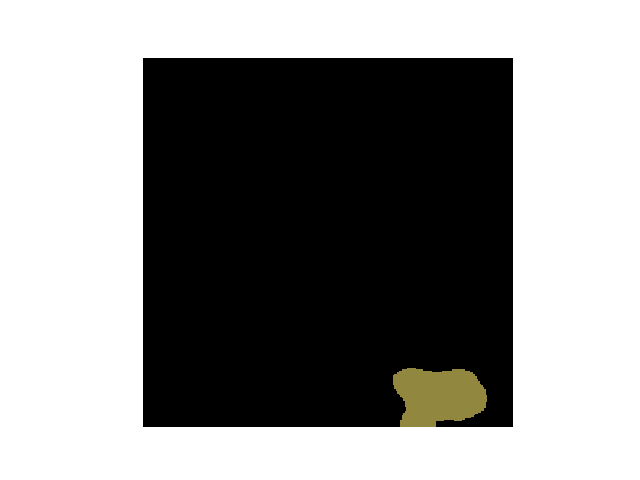

In [34]:
mask = normalized_masks[0, :, :, :].argmax(axis=0).detach().cpu().numpy()
stackview.insight(mask)

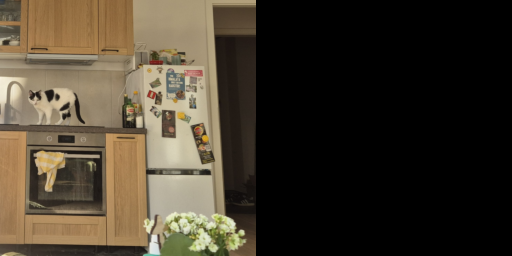

In [35]:
car_mask_uint8 = 255 * np.uint8(mask == selected_class_idx)
car_mask_float = np.float32(mask == selected_class_idx)

both_images = np.hstack((image, np.repeat(car_mask_uint8[:, :, None], 3, axis=-1)))
Image.fromarray(both_images)